# Regressão Logística - Continuação

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score,  precision_score, recall_score, f1_score, classification_report

**1)** [COVID](https://www.kaggle.com/tanmoyx/covid19-patient-precondition-dataset?select=covid.csv): Esses dados estão no dataset *COVID.csv* e nele encontramos alguns dados sobre os casos de Covid no México, onde têm os sintomas e caractéristicas dos pacientes além do resultado do teste para Covid.

A descrição das variáveis estão indicadas abaixo:<br>
 - **id**: Identificação do paciente<br>
 - **sex**: Sexo do Paciente (0 - Homem / 1 - Mulher) <br>
 - **patient_type**: Se o paciente foi dispensado para casa (1) ou se foi internado (0) <br>
 - **intubed**: Se o paciente foi intubado ou não<br>
 - **pneumonia**: Se o paciente apresentou pneumonia ou não<br>
 - **age**: Idade do Paciente<br>
 - **pregnancy**: Se a paciente estava grávida ou não (para pacientes mulheres)<br>
 - **diabetes**: Se o paciente tem diabetes ou não<br>
 - **copd**: Se o paciente tem COPD ou não<br>
 - **asthma**: Se o paciente tem Asma ou não<br>
 - **inmsupr**: Se o paciente apresentou Imunosupressão ou não<br>
 - **hypertension**: Se o paciente tem hipertensão ou não<br>
 - **ohter_disease**: Se o paciente tem outras doenças ou não<br>
 - **cardiovascular**: Se o paciente tem doenças cardiácas ou não<br>
 - **obesity**: Se o paciente tem obesidade ou não<br>
 - **renal_chronic**: Se o paciente tem problemas renais ou não<br>
 - **tobacco**: Se o paciente é fumante ou não<br>
 - **contact_other_covid**: Se o paciente teve contato com outras pessoas diagnosticadas com covid<br>
 - **icu**: Se o paciente precisou ser internado na UTI<br>
 - **covid_res**: Se o resultado do teste foi Positivo ou Negativo<br>

In [2]:
covid = pd.read_csv('COVID.csv', index_col=0)

In [3]:
covid

,sex,patient_type,intubed,pneumonia,age,pregnancy,diabetes,copd,asthma,inmsupr,hypertension,other_disease,cardiovascular,obesity,renal_chronic,tobacco,contact_other_covid,covid_res,icu
0,0,1,NaN,0.0,27,NaN,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1,NaN
1,0,1,NaN,0.0,24,NaN,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,NaN,1,NaN
2,1,0,0.0,0.0,54,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,NaN,1,0.0
3,0,0,0.0,1.0,30,NaN,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,NaN,1,0.0
4,1,0,0.0,0.0,60,0.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,NaN,1,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
499687,0,1,NaN,1.0,77,NaN,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0,NaN
499688,0,0,1.0,1.0,63,NaN,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0,0.0
499689,1,1,NaN,0.0,25,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,NaN
499690,1,1,NaN,0.0,45,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0,NaN


In [4]:
covid.isna().sum()

sex                         0
patient_type                0
intubed                392268
pneumonia                  11
age                         0
pregnancy              254434
diabetes                 1641
copd                     1446
asthma                   1442
inmsupr                  1662
hypertension             1489
other_disease            2193
cardiovascular           1509
obesity                  1470
renal_chronic            1476
tobacco                  1579
contact_other_covid    153675
covid_res                   0
icu                    392269
dtype: int64

In [5]:
(covid.isna().sum()/len(covid))*100

sex                     0.000000
patient_type            0.000000
intubed                78.501957
pneumonia               0.002201
age                     0.000000
pregnancy              50.918166
diabetes                0.328402
copd                    0.289378
asthma                  0.288578
inmsupr                 0.332605
hypertension            0.297984
other_disease           0.438870
cardiovascular          0.301986
obesity                 0.294181
renal_chronic           0.295382
tobacco                 0.315995
contact_other_covid    30.753944
covid_res               0.000000
icu                    78.502157
dtype: float64

icu, intubed tem muito dado faltante (78%) e iremos eliminar a coluna

In [9]:
covid['icu'].value_counts(dropna=False, normalize=True)*100

NaN    78.502157
0.0    19.694932
1.0     1.802911
Name: icu, dtype: float64

In [10]:
covid['sex'].value_counts(dropna=False, normalize=True)*100

0    50.650801
1    49.349199
Name: sex, dtype: float64

In [12]:
covid['pregnancy'].value_counts(dropna=False, normalize=True)*100

NaN    50.918166
0.0    48.358589
1.0     0.723246
Name: pregnancy, dtype: float64

In [13]:
covid.groupby(['sex'])['pregnancy'].value_counts(dropna=False, normalize=True)*100

sex  pregnancy
0    NaN          100.000000
1    0.0           97.992652
     1.0            1.465567
     NaN            0.541781
Name: pregnancy, dtype: float64

In [15]:
covid.loc[covid['sex'] == 0, 'pregnancy'] = 0
# substituindo para gravidez zero em todos os homens

In [16]:
covid.columns

Index(['sex', 'patient_type', 'intubed', 'pneumonia', 'age', 'pregnancy',
       'diabetes', 'copd', 'asthma', 'inmsupr', 'hypertension',
       'other_disease', 'cardiovascular', 'obesity', 'renal_chronic',
       'tobacco', 'contact_other_covid', 'covid_res', 'icu'],
      dtype='object')

In [17]:
# eliminando as colunas que não temos interesse
covid = covid.drop(columns=['intubed', 'icu'])

In [20]:
# eliminar os registros onde tem algum dado faltante
covid = covid.dropna()

In [21]:
covid.isna().sum()

sex                    0
patient_type           0
pneumonia              0
age                    0
pregnancy              0
diabetes               0
copd                   0
asthma                 0
inmsupr                0
hypertension           0
other_disease          0
cardiovascular         0
obesity                0
renal_chronic          0
tobacco                0
contact_other_covid    0
covid_res              0
dtype: int64

In [23]:
covid.reset_index(drop=True, inplace=True)

In [24]:
covid

,sex,patient_type,pneumonia,age,pregnancy,diabetes,copd,asthma,inmsupr,hypertension,other_disease,cardiovascular,obesity,renal_chronic,tobacco,contact_other_covid,covid_res
0,0,1,0.0,27,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1
1,1,1,0.0,56,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,1.0,1.0,1
2,1,1,0.0,34,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1
3,1,1,0.0,34,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1
4,1,1,0.0,49,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
342690,1,1,0.0,15,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0
342691,0,1,1.0,77,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0
342692,0,0,1.0,63,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0
342693,1,1,0.0,25,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0


In [25]:
covid.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 342695 entries, 0 to 342694
Data columns (total 17 columns):
 #   Column               Non-Null Count   Dtype  
---  ------               --------------   -----  
 0   sex                  342695 non-null  int64  
 1   patient_type         342695 non-null  int64  
 2   pneumonia            342695 non-null  float64
 3   age                  342695 non-null  int64  
 4   pregnancy            342695 non-null  float64
 5   diabetes             342695 non-null  float64
 6   copd                 342695 non-null  float64
 7   asthma               342695 non-null  float64
 8   inmsupr              342695 non-null  float64
 9   hypertension         342695 non-null  float64
 10  other_disease        342695 non-null  float64
 11  cardiovascular       342695 non-null  float64
 12  obesity              342695 non-null  float64
 13  renal_chronic        342695 non-null  float64
 14  tobacco              342695 non-null  float64
 15  contact_other_cov

Acima preparamos os dados. Agora vamos iniciar a parte da construção do modelo

In [26]:
X = covid.drop(['covid_res'], axis=1)
y = covid['covid_res']

In [27]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [28]:
model = LogisticRegression(max_iter = 1000)

In [29]:
model.fit(X_train, y_train)

LogisticRegression(max_iter=1000)

In [30]:
y_pred = model.predict(X_test)
y_pred

array([0, 0, 1, ..., 0, 1, 0], dtype=int64)

In [32]:
y_pred_proba = model.predict_proba(X_test)
y_pred_proba

array([[0.65204218, 0.34795782],
       [0.70666268, 0.29333732],
       [0.40130828, 0.59869172],
       ...,
       [0.64941266, 0.35058734],
       [0.4920174 , 0.5079826 ],
       [0.59787969, 0.40212031]])

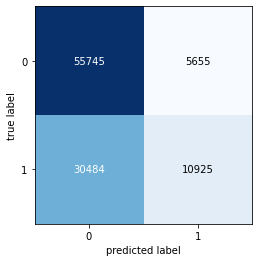

In [33]:
from mlxtend.plotting import plot_confusion_matrix
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt

cm = confusion_matrix(y_test, y_pred)

plot_confusion_matrix(conf_mat=cm)
plt.show()

In [34]:
print('Acurácia: ', accuracy_score(y_test, y_pred))
print('Precision: ', precision_score(y_test, y_pred))
print('Recall: ', recall_score(y_test, y_pred))
print('F1-Score: ', f1_score(y_test, y_pred))

Acurácia:  0.6484840821328872
Precision:  0.6589264173703256
Recall:  0.2638315342075394
F1-Score:  0.376795599165359


In [36]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.65      0.91      0.76     61400
           1       0.66      0.26      0.38     41409

    accuracy                           0.65    102809
   macro avg       0.65      0.59      0.57    102809
weighted avg       0.65      0.65      0.60    102809



# Escolha de Threshold

In [37]:
# Criando o predict proba para a base de teste

y_proba_test = model.predict_proba(X_test)
y_proba_test

array([[0.65204218, 0.34795782],
       [0.70666268, 0.29333732],
       [0.40130828, 0.59869172],
       ...,
       [0.64941266, 0.35058734],
       [0.4920174 , 0.5079826 ],
       [0.59787969, 0.40212031]])

In [38]:
results_test = pd.DataFrame(y_test)
results_test['proba'] = np.round(y_proba_test[:, 1], 3)

In [39]:
#Criando um dataframe com a probabilidade da classe 1 e a marcação de target
results_test.head()

,covid_res,proba
206327,0,0.348
117552,1,0.293
119525,1,0.599
235952,0,0.270
172174,0,0.373


In [40]:
# Parâmetros para o Looping

threshold_increment  = 0.02
threshold_begin = threshold_increment
threshold_end    = 1.0

In [42]:
import warnings
warnings.filterwarnings('ignore')

# Para cada threshold, no looping calcula TN, FN, FP, TP e outras métricas

list_threshold  = []
list_TN         = []
list_FN         = []
list_FP         = []
list_TP         = []
list_precision  = []
list_recall     = []
list_accuracy   = []
list_f1_score   = []

for i in np.arange(threshold_begin, threshold_end + threshold_increment, threshold_increment):
    i_threshold = np.round(i, 2)
    print(str(i_threshold) + ' ', end = '')
    
    results_test['y_pred'] = results_test['proba'].apply(lambda x: 1 if x >= i_threshold else 0)
    results_test['flag_TN'] = np.where((results_test['y_pred'] == 0) & (results_test['covid_res'] == 0), 1, 0)
    results_test['flag_FN'] = np.where((results_test['y_pred'] == 0) & (results_test['covid_res'] == 1), 1, 0)
    results_test['flag_TP'] = np.where((results_test['y_pred'] == 1) & (results_test['covid_res'] == 1), 1, 0)
    results_test['flag_FP'] = np.where((results_test['y_pred'] == 1) & (results_test['covid_res'] == 0), 1, 0)
  
    TN = results_test['flag_TN'].sum()
    FN = results_test['flag_FN'].sum()
    TP = results_test['flag_TP'].sum()
    FP = results_test['flag_FP'].sum()
    
    precision = np.where((TP + FP) > 0, TP / (TP + FP), 0)
    recall = np.where((TP + FN) > 0, TP / (TP + FN), 0)
    accuracy = np.where((TN + FN + TP + FP) > 0, 
                         (TP + TN)/(TN + FN + TP + FP), 0)
    f1_score = np.where((precision + recall) > 0, (2 * precision * recall)/(precision + recall), 0)
    
    list_threshold.append(i_threshold)
    list_TN.append(TN)
    list_FN.append(FN)
    list_FP.append(FP)
    list_TP.append(TP)
    list_precision.append(np.round(precision, 4))
    list_recall.append(np.round(recall, 4))
    list_accuracy.append(np.round(accuracy, 4))
    list_f1_score.append(np.round(f1_score, 4))

#---------------------
dict_output = {
  "threshold" : list_threshold, 
  "TN" : list_TN,
  "FN" : list_FN,
  "FP" : list_FP,
  "TP" : list_TP,
  "precision" : list_precision,
  "recall" : list_recall,
  "accuracy" : list_accuracy,
  "f1_score" : list_f1_score
}

df_results = pd.DataFrame(dict_output)

0.02 0.04 0.06 0.08 0.1 0.12 0.14 0.16 0.18 0.2 0.22 0.24 0.26 0.28 0.3 0.32 0.34 0.36 0.38 0.4 0.42 0.44 0.46 0.48 0.5 0.52 0.54 0.56 0.58 0.6 0.62 0.64 0.66 0.68 0.7 0.72 0.74 0.76 0.78 0.8 0.82 0.84 0.86 0.88 0.9 0.92 0.94 0.96 0.98 1.0 

In [43]:
df_results

,threshold,TN,FN,FP,TP,precision,recall,accuracy,f1_score
0,0.02,0,0,61400,41409,0.4028,1.0000,0.4028,0.5743
1,0.04,0,0,61400,41409,0.4028,1.0000,0.4028,0.5743
2,0.06,0,0,61400,41409,0.4028,1.0000,0.4028,0.5743
3,0.08,3,4,61397,41405,0.4028,0.9999,0.4028,0.5742
4,0.10,10,6,61390,41403,0.4028,0.9999,0.4028,0.5742
5,0.12,13,7,61387,41402,0.4028,0.9998,0.4028,0.5742
6,0.14,30,10,61370,41399,0.4028,0.9998,0.4030,0.5743
7,0.16,57,15,61343,41394,0.4029,0.9996,0.4032,0.5743
8,0.18,114,36,61286,41373,0.4030,0.9991,0.4035,0.5744
9,0.20,212,81,61188,41328,0.4031,0.9980,0.4041,0.5743


Text(0.5, 1.0, 'Precision and Recall')

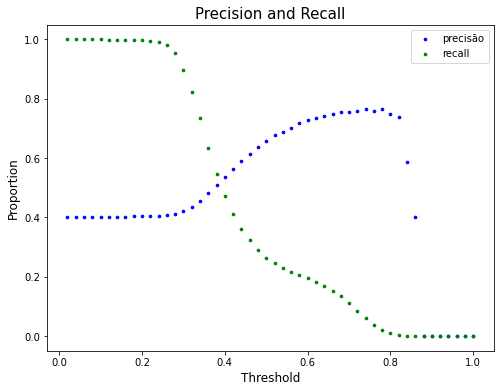

In [45]:
# Precison-Recall-Threshold Curve

k = 2
fig = plt.figure(figsize = (k*4,k*3))
ax1 = fig.add_subplot(111)
ax1.scatter(df_results['threshold'], df_results['precision'], color = 'b', s = 7, label='precisão')
ax1.scatter(df_results['threshold'], df_results['recall']   , color = 'g', s = 7, label = 'recall')
ax1.set_xlabel('Threshold', fontsize = 12)
ax1.set_ylabel('Proportion', fontsize = 12)
plt.legend()
plt.title("Precision and Recall", fontsize = 15)

[Text(0.5, 0, 'Threshold'), Text(0, 0.5, 'F1 Score'), (0.0, 1.02), (0.0, 1.0)]

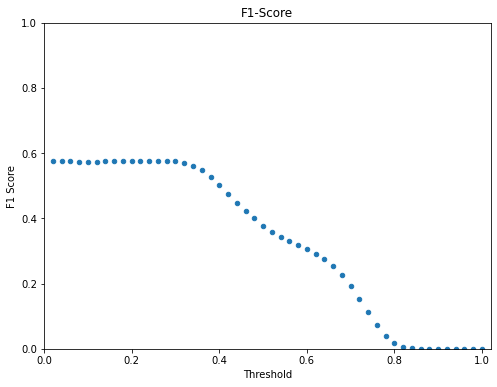

In [46]:
# F1-Score Curve

grap = df_results[df_results["threshold"] > 0.0].plot(kind="scatter", 
                                                         x="threshold", 
                                                         y="f1_score", 
                                                         grid=False, 
                                                         legend=True, 
                                                         title="F1-Score",
                                                         figsize=[8,6])
grap.set(xlabel="Threshold", 
            ylabel="F1 Score", 
            xlim=(0.0,1.02), 
            ylim=(0.0,1.0))


In [47]:
# Create y_predict using a new threshold

y_pred2 = np.where(y_proba_test[:,1] >= 0.3, 1, 0)
y_pred2

array([1, 0, 1, ..., 1, 1, 1])

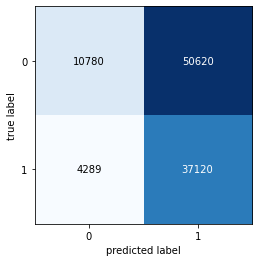

In [48]:
cm = confusion_matrix(y_test, y_pred2)

plot_confusion_matrix(conf_mat=cm)
plt.show()

In [49]:
print(classification_report(y_test, y_pred2))

              precision    recall  f1-score   support

           0       0.72      0.18      0.28     61400
           1       0.42      0.90      0.57     41409

    accuracy                           0.47    102809
   macro avg       0.57      0.54      0.43    102809
weighted avg       0.60      0.47      0.40    102809

